In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = (zip(x, y))

In [5]:
# Use the tuple() function to display the latitude and longZZZitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

84

In [8]:
# Create an empty list to hold the weather data.
#city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

In [9]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
 #   if (i % 50 == 0 and i >= 50):
  #      set_count += 1
   #     record_count = 1
    #    time.sleep(60)

    # Create endpoint URL with each city.
   # city_url = url + "&q=" + cities[i]

In [10]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
         # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | port macquarie
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | belmonte
Processing Record 13 of Set 1 | sabang
Processing Record 14 of Set 1 | tarauaca
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | acapulco
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,63.81,63,29,7.81,NZ,2022-05-02 23:53:03
1,Georgetown,5.4112,100.3354,80.55,89,40,9.22,MY,2022-05-02 23:53:03
2,Severo-Kurilsk,50.6789,156.1250,35.85,79,100,2.26,RU,2022-05-02 23:53:04
3,Busselton,-33.6500,115.3333,56.41,79,70,8.79,AU,2022-05-02 23:53:04
4,Fortuna,40.5982,-124.1573,56.86,60,75,18.41,US,2022-05-02 23:53:05
5,Faanui,-16.4833,-151.7500,81.23,74,89,8.97,PF,2022-05-02 23:53:05
6,Puerto Ayora,-0.7393,-90.3518,73.33,85,17,7.70,EC,2022-05-02 23:53:06
7,Port Macquarie,-31.4333,152.9167,69.89,65,7,2.57,AU,2022-05-02 23:53:06
8,Vaini,-21.2000,-175.2000,80.76,74,75,11.50,TO,2022-05-02 23:53:07
9,Belmonte,-15.8631,-38.8828,75.96,80,3,5.95,BR,2022-05-02 23:53:07


In [12]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
#we assign a new or the same DataFrame with new column order:

city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-05-02 23:53:03,-46.6000,168.3333,63.81,63,29,7.81
1,Georgetown,MY,2022-05-02 23:53:03,5.4112,100.3354,80.55,89,40,9.22
2,Severo-Kurilsk,RU,2022-05-02 23:53:04,50.6789,156.1250,35.85,79,100,2.26
3,Busselton,AU,2022-05-02 23:53:04,-33.6500,115.3333,56.41,79,70,8.79
4,Fortuna,US,2022-05-02 23:53:05,40.5982,-124.1573,56.86,60,75,18.41
...,...,...,...,...,...,...,...,...,...
70,Atuona,PF,2022-05-02 23:54:33,-9.8000,-139.0333,79.39,80,56,15.55
71,Port Lincoln,AU,2022-05-02 23:54:34,-34.7333,135.8667,63.73,64,45,16.20
72,Hasaki,JP,2022-05-02 23:54:34,35.7333,140.8333,57.60,58,75,12.10
73,Pemangkat,ID,2022-05-02 23:54:35,1.1667,108.9667,77.81,89,93,7.02


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

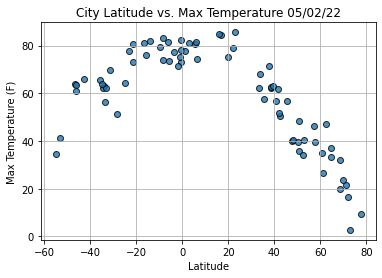

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

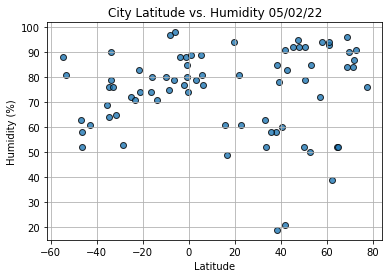

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

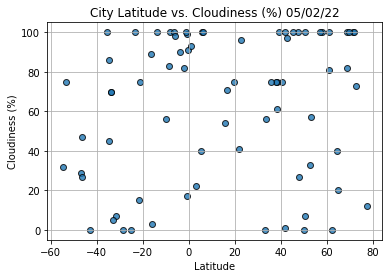

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

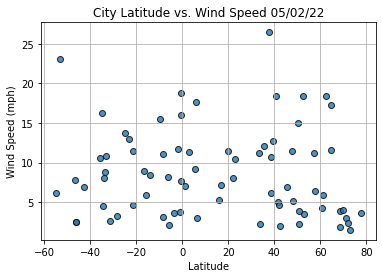

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [73]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2022-05-02 23:53:09
Lat                      -46.1927
Lng                      168.8643
Max Temp                    63.48
Humidity                       52
Cloudiness                     47
Wind Speed                   2.46
Name: 13, dtype: object

In [74]:
city_data_df["Lat"] >= 0

0     False
1      True
2      True
3     False
4      True
      ...  
70    False
71    False
72     True
73     True
74    False
Name: Lat, Length: 75, dtype: bool

In [75]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Georgetown,MY,2022-05-02 23:53:03,5.4112,100.3354,80.55,89,40,9.22
2,Severo-Kurilsk,RU,2022-05-02 23:53:04,50.6789,156.1250,35.85,79,100,2.26
4,Fortuna,US,2022-05-02 23:53:05,40.5982,-124.1573,56.86,60,75,18.41
10,Sabang,ID,2022-05-02 23:53:08,5.8933,95.3214,81.55,81,100,17.63
12,Butaritari,KI,2022-05-02 23:53:09,3.0707,172.7902,81.19,79,22,11.39


In [76]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-05-02 23:53:03,-46.6000,168.3333,63.81,63,29,7.81
3,Busselton,AU,2022-05-02 23:53:04,-33.6500,115.3333,56.41,79,70,8.79
5,Faanui,PF,2022-05-02 23:53:05,-16.4833,-151.7500,81.23,74,89,8.97
6,Puerto Ayora,EC,2022-05-02 23:53:06,-0.7393,-90.3518,73.33,85,17,7.70
7,Port Macquarie,AU,2022-05-02 23:53:06,-31.4333,152.9167,69.89,65,7,2.57
8,Vaini,TO,2022-05-02 23:53:07,-21.2000,-175.2000,80.76,74,75,11.50
9,Belmonte,BR,2022-05-02 23:53:07,-15.8631,-38.8828,75.96,80,3,5.95
11,Tarauaca,BR,2022-05-02 23:53:08,-8.1614,-70.7656,74.05,97,100,3.13
13,Mataura,NZ,2022-05-02 23:53:09,-46.1927,168.8643,63.48,52,47,2.46
16,Punta Arenas,CL,2022-05-02 23:51:55,-53.1500,-70.9167,41.11,81,75,23.02


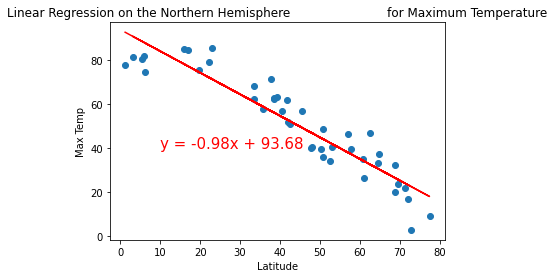

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


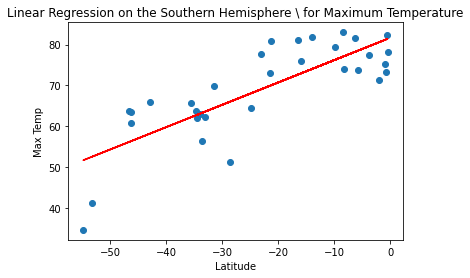

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

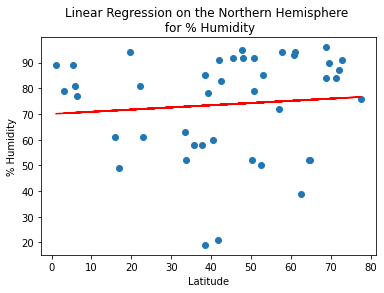

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

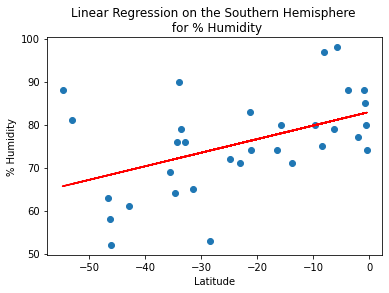

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

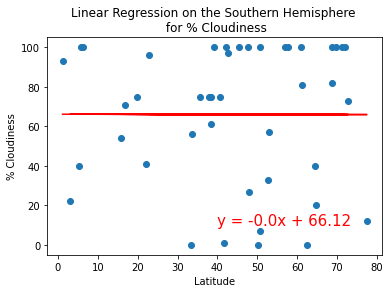

In [102]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

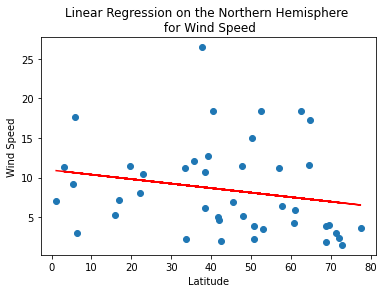

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))